In [ ]:
import pandas as pd

In [ ]:
test = pd.read_csv('/content/test_dataset.csv')

In [ ]:
train = pd.read_csv('/content/train_dataset.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Port Number                    4998 non-null   int64
 1   Received Packets               4998 non-null   int64
 2   Received Bytes                 4998 non-null   int64
 3   Sent Bytes                     4998 non-null   int64
 4   Sent Packets                   4998 non-null   int64
 5   Port alive Duration (S)        4998 non-null   int64
 6   Packets Rx Dropped             4998 non-null   int64
 7   Packets Tx Dropped             4998 non-null   int64
 8   Packets Rx Errors              4998 non-null   int64
 9   Packets Tx Errors              4998 non-null   int64
 10  Delta Received Packets         4998 non-null   int64
 11  Delta Received Bytes           4998 non-null   int64
 12  Delta Sent Bytes               4998 non-null   int64
 13  Delta Sent Packets

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# Load your dataset
data = pd.read_csv('/content/train_dataset.csv')

# Extract features and target labels
X = data.drop(columns=['Label'])  # All features
y = data['Label']  # Target column

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data into 3D format for CNN-LSTM (samples, time steps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check shapes
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (3998, 31, 1), Test data shape: (1000, 31, 1)


In [ ]:
# Initialize the CNN-LSTM model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# Add LSTM layer
model.add(LSTM(units=100, return_sequences=False))

# Add a Dense layer for output
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification or use softmax for multi-class

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 29, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          66,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,357 (278.74 KB)

 Trainable params: 71,357 (278.74 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=120, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.6353 - loss: -2726.9785 - val_accuracy: 0.6410 - val_loss: -2783.8772
Epoch 2/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6449 - loss: -2731.5278 - val_accuracy: 0.6420 - val_loss: -2850.6987
Epoch 3/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6461 - loss: -2781.9336 - val_accuracy: 0.6420 - val_loss: -2919.1365
Epoch 4/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6355 - loss: -2804.1221 - val_accuracy: 0.6390 - val_loss: -2977.7544
Epoch 5/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6136 - loss: -2859.1016 - val_accuracy: 0.6420 - val_loss: -3046.4336
Epoch 6/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.6387 - loss: -3057.0200 - val_accuracy: 0.6420 - val_loss: -3123.0420
Epoch 7/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6503 - loss: -3016.7642 - val_accuracy: 0.6420 - val_loss: -3193.2314
Epoch 8/120
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/s

32/32 - 0s - 5ms/step - accuracy: 0.6420 - loss: -1.4802e+04
Test Accuracy: 0.6420000195503235
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       520
           1       0.25      1.00      0.41       122
           2       0.00      0.00      0.00       127
           3       0.00      0.00      0.00       130
           4       0.00      0.00      0.00        87
           5       0.00      0.00      0.00        14

    accuracy                           0.64      1000
   macro avg       0.21      0.33      0.23      1000
weighted avg       0.55      0.64      0.57      1000

Confusion Matrix:
[[520   0   0   0   0   0]
 [  0 122   0   0   0   0]
 [  0 127   0   0   0   0]
 [  0 130   0   0   0   0]
 [  0  87   0   0   0   0]
 [  0  14   0   0   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


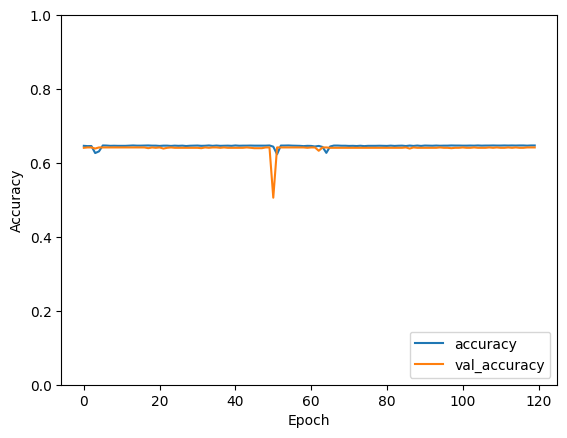

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

# Predictions on the test data
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # For binary classification

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

# Plotting the training history (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv('/content/train_dataset.csv')

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label
0,4,305111,25506841,100234870,284579,1657,0,0,0,0,...,0,0,0,1,0,6,992868,992744,-1,0
1,2,209,20671,6316631,274,96,0,0,0,0,...,183877,6303353,183877,1,0,8,90551,90494,-1,3
2,4,150,19774,6475473,3054,166,0,0,0,0,...,502,6439888,502,1,0,6,7516,7418,-1,2
3,1,4699,100986365,124574097,413351,2267,0,0,0,0,...,0,0,0,1,0,8,664849,664714,-1,0
4,3,990,104058,88896,778,792,0,0,0,0,...,715,7152,715,1,0,5,4328,4201,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,3,180657,158912655,195046297,291446,2597,0,0,0,0,...,0,0,0,1,0,4,669087,668951,-1,0
4994,1,180388,51777654,12692793,299993,1700,0,0,0,0,...,0,0,0,1,0,4,957168,957036,-1,0
4995,2,3051,31735692,140143,1046,1496,0,0,0,0,...,0,0,0,1,0,504,7902,7772,-1,1
4996,3,183279,209436883,101192774,156080,2890,0,0,0,0,...,0,0,0,1,0,4,667137,667002,-1,0


In [9]:


import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/train_dataset.csv')

# Separate features (X) and target (y)
X = df.drop('Label', axis=1)
y = df['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier (you can use other models too)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 features
print("\nTop 10 Feature Importances:")
print(feature_importance_df.head(7))


Accuracy: 0.936

Top 10 Feature Importances:
                    Feature  Importance
29          Packets Matched    0.203179
28        Packets Looked Up    0.198831
5   Port alive Duration (S)    0.134059
4              Sent Packets    0.112169
1          Received Packets    0.070635
3                Sent Bytes    0.065536
2            Received Bytes    0.047943


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.5514 - loss: 1.3748 - val_accuracy: 0.6575 - val_loss: 0.7966
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6750 - loss: 0.7713 - val_accuracy: 0.6888 - val_loss: 0.6599
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7057 - loss: 0.6936 - val_accuracy: 0.6662 - val_loss: 0.6803
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7067 - loss: 0.6685 - val_accuracy: 0.7088 - val_loss: 0.5964
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7136 - loss: 0.6243 - val_accuracy: 0.7487 - val_loss: 0.5395
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7652 - loss: 0.5221 - val_accuracy: 0.7500 - val_loss: 0.4963
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7661 - loss: 0.5048 - val_accuracy: 0.7550 - val_loss: 0.4989
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7966 - loss: 0.4726 - val_accu

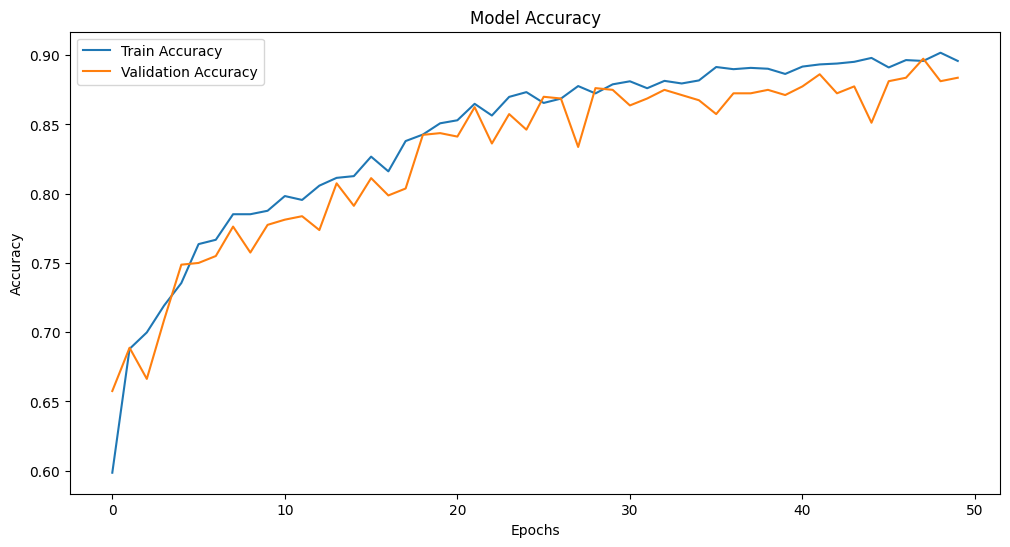

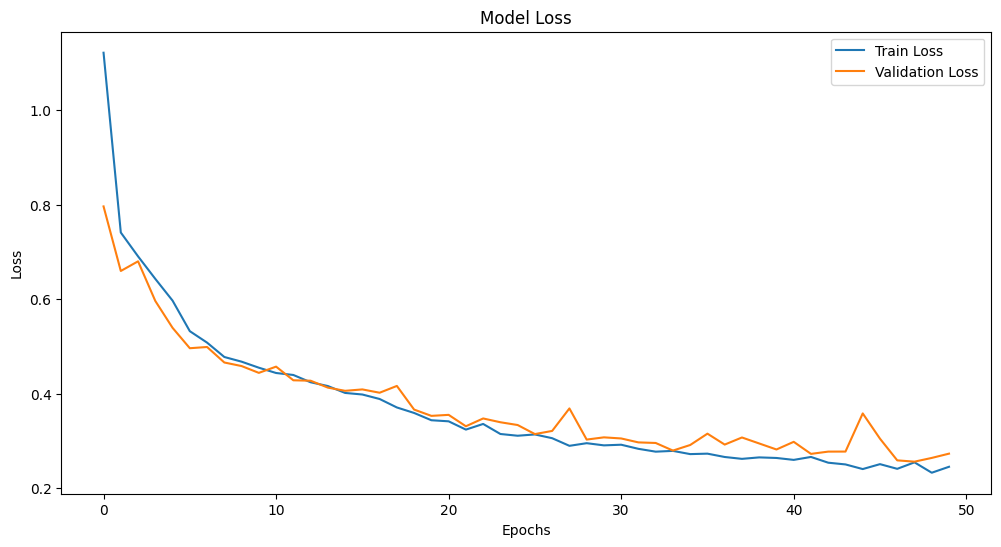

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('/content/train_dataset.csv')

# Data Preprocessing
X = df.drop('Label', axis=1).values
y = df['Label'].values

# Encoding the labels
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshaping for CNN and LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# CNN-LSTM Model
model = Sequential()

# CNN Layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# LSTM Layers
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Fully Connected Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes, target_names=le.classes_.astype(str)))

# Plot Training History
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


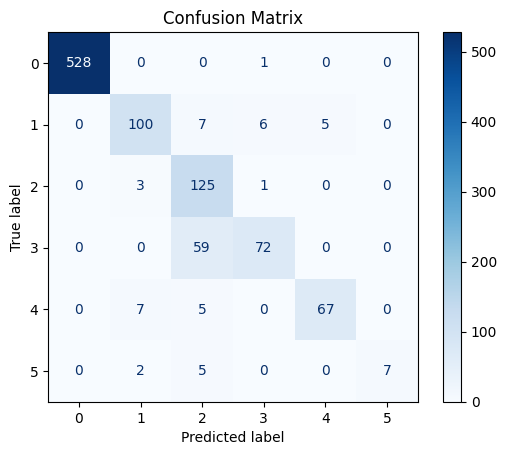

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


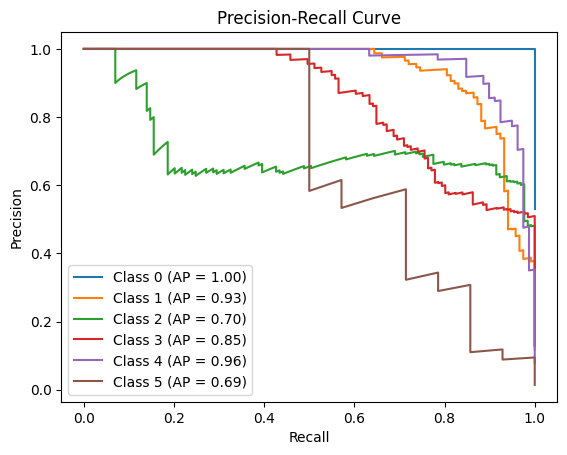

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_probs = model.predict(X_test)

# For each class, compute the precision-recall curve
for i in range(y_test.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred_probs[:, i])
    average_precision = average_precision_score(y_test[:, i], y_pred_probs[:, i])

    # Plot the precision-recall curve
    plt.plot(recall, precision, label=f"Class {i} (AP = {average_precision:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [ ]:
model.save('/content/intrusion_detection_model.h5')


In [ ]:
import joblib

# Assuming the scaler is named 'scaler'
joblib.dump(scaler, '/content/scaler.pkl')


['/content/scaler.pkl']

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.1


# section2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset
data = pd.read_csv('/content/train_dataset.csv')  # Replace with your dataset path

# Separate features and labels
X = data.drop(columns=['Label'])  # Exclude the label column
y = data['Label']  # Target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for CNN-LSTM
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Save the scaler for Streamlit usage
import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
# Encoding the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Check the number of unique classes
num_classes = len(label_encoder.classes_)

# Build the model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(31, 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Adjust output units
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=70, batch_size=32, validation_data=(X_test_scaled, y_test))

# Save the model
model.save('intrusion_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 56s 15ms/step - accuracy: 0.6222 - loss: 1.0974 - val_accuracy: 0.7660 - val_loss: 0.5528
Epoch 2/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7659 - loss: 0.5228 - val_accuracy: 0.8050 - val_loss: 0.4370
Epoch 3/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8063 - loss: 0.4542 - val_accuracy: 0.8200 - val_loss: 0.3979
Epoch 4/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8144 - loss: 0.3989 - val_accuracy: 0.8330 - val_loss: 0.3936
Epoch 5/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8189 - loss: 0.3748 - val_accuracy: 0.8360 - val_loss: 0.3616
Epoch 6/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8359 - loss: 0.3687 - val_accuracy: 0.8390 - val_loss: 0.3761
Epoch 7/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8353 - loss: 0.3702 - val_accuracy: 0.8370 - val_loss: 0.3131
Epoch 8/70
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8556 - loss: 0.3220 - val_acc

In [ ]:
# Load the old model
model = tf.keras.models.load_model('intrusion_detection_model.h5', compile=False)

# Define input shape explicitly
inputs = tf.keras.Input(shape=(31, 1))
outputs = model(inputs)

# Create a new compatible model
updated_model = tf.keras.Model(inputs, outputs)

# Save the updated model
updated_model.save('updated_intrusion_model.h5')


In [ ]:
attack_info = {
    "Normal": "No intrusion detected. Network is safe.",
    "DoS": "Denial of Service attack detected. Prevent unauthorized access to network.",
    "Probe": "Port scanning detected. Monitor network traffic closely.",
    "R2L": "Remote to Local attack detected. Restrict external access to the network.",
    "U2R": "User to Root attack detected. Review system logs for suspicious activity."
}




Switch ID - The switch through which the network flow passed

Port Number - The switch port through which the flow passed

Received Packets - Number of packets received by the port

Received Bytes - Number of bytes received by the port

Sent Bytes - Number of bytes sent by the port

Sent Packets - Number of packets sent by the port

Port alive Duration (S) - The time port has been alive in seconds

Packets Rx Dropped - Number of packets dropped by the receiver

Packets Tx Dropped - Number of packets dropped by the sender

Packets Rx Errors - Number of transmit errors

Delta Received Packets - Number of packets received by the port

Delta Received Bytes - Number of bytes received by the port

Delta Sent Bytes - Number of bytes sent by the port

Delta Sent Packets - Number of packets sent by the port

Delta Port alive Duration (S) - The time port has been alive in seconds

Delta Packets Rx Dropped - Number of packets dropped by the receiver

Delta Packets Tx Dropped - Number of packets dropped by the sender

Delta Packets Rx Errors - Number of receive errors

Delta Packets Tx Errors - Number of transmit errors

Connection Point - Network connection point expressed as a pair of the network element identifier and port number.

Total Load/Rate - Obtain the current observed total load/rate (in bytes/s) on a link.

Total Load/Latest - Obtain the latest total load bytes counter viewed on that link.

Load/Rate - Obtain the current observed unknown-sized load/rate (in bytes/s) on a link.

Unknown Load/Latest - Obtain the latest unknown-sized load bytes counter viewed on that link.

Latest bytes counter - Latest bytes counted in the switch port

Checkis_valit - Indicates whether this load was built on valid values.

vpn_keyTable ID - Returns the Table ID values.

Active Flow Entries - Returns the number of active flow entries in this table.

Packets Looked Up - Returns the number of packets looked up in the table.

Packets Matched - Returns the number of packets that successfully matched in the table.

Max Size - Returns the maximum size of this table.

Label - Label types for intrusions

# section 3


In [7]:


import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/train_dataset.csv')

# Separate features (X) and target (y)
X = df.drop('Label', axis=1)
y = df['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier (you can use other models too)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 features
print("\nTop 10 Feature Importances:")
print(feature_importance_df.head(31))


Accuracy: 0.936

Top 10 Feature Importances:
                          Feature  Importance
29                Packets Matched    0.203179
28              Packets Looked Up    0.198831
5         Port alive Duration (S)    0.134059
4                    Sent Packets    0.112169
1                Received Packets    0.070635
3                      Sent Bytes    0.065536
2                  Received Bytes    0.047943
19               Connection Point    0.032682
27            Active Flow Entries    0.020781
11           Delta Received Bytes    0.017814
0                     Port Number    0.015158
10         Delta Received Packets    0.014815
12               Delta Sent Bytes    0.014055
13             Delta Sent Packets    0.012708
21              Total Load/Latest    0.009326
23            Unknown Load/Latest    0.009050
20                Total Load/Rate    0.006776
22              Unknown Load/Rate    0.006162
24           Latest bytes counter    0.004908
14  Delta Port alive Duration (S)  

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the dataset
df = pd.read_csv('/content/train_dataset.csv')

# Select the top 7 features
top_features = ['Packets Matched', 'Packets Looked Up', 'Port alive Duration (S)', 'Sent Packets', 'Received Bytes', 'Sent Bytes', 'Received Packets']
X = df[top_features]
y = df['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Save the scaler and model
joblib.dump(scaler, '/content/scaler_top7.pkl')
joblib.dump(model, '/content/model_top7.pkl')


['/content/model_top7.pkl']

In [5]:
# Select the top 7 features
top_features = ['Packets Matched', 'Packets Looked Up', 'Port alive Duration (S)', 'Sent Packets', 'Received Bytes', 'Sent Bytes', 'Received Packets']
X = df[top_features]
y = df['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
X_train_scaled

array([[-0.74867914, -0.74868595, -1.17536154, ..., -0.95216479,
        -0.45077602, -0.68964101],
       [-1.05939319, -1.05944788, -1.32262744, ..., -0.9526102 ,
        -0.9615689 , -0.69152701],
       [ 0.62390745,  0.62391881,  0.63143872, ..., -0.6557053 ,
         0.5696374 ,  2.16209451],
       ...,
       [ 1.51975537,  1.51977477,  1.1971429 , ..., -0.4018441 ,
         2.20336786,  1.80504483],
       [ 0.67513505,  0.67516893,  1.70495635, ..., -0.01853171,
         1.00094902,  2.18801678],
       [ 1.3843544 ,  1.3843676 , -0.09981265, ..., -0.5474275 ,
        -0.70693288,  0.76690484]])

In [7]:
X_train_scaled

array([[-0.74867914, -0.74868595, -1.17536154, ..., -0.95216479,
        -0.45077602, -0.68964101],
       [-1.05939319, -1.05944788, -1.32262744, ..., -0.9526102 ,
        -0.9615689 , -0.69152701],
       [ 0.62390745,  0.62391881,  0.63143872, ..., -0.6557053 ,
         0.5696374 ,  2.16209451],
       ...,
       [ 1.51975537,  1.51977477,  1.1971429 , ..., -0.4018441 ,
         2.20336786,  1.80504483],
       [ 0.67513505,  0.67516893,  1.70495635, ..., -0.01853171,
         1.00094902,  2.18801678],
       [ 1.3843544 ,  1.3843676 , -0.09981265, ..., -0.5474275 ,
        -0.70693288,  0.76690484]])

#section n3

In [11]:
df = pd.read_csv('/content/train_dataset.csv')

In [12]:
# Select the top 7 features
top_features = ['Packets Matched', 'Packets Looked Up', 'Port alive Duration (S)', 'Sent Packets', 'Received Bytes', 'Sent Bytes', 'Received Packets']
X = df[top_features]
y = df['Label']

In [13]:
X

,Packets Matched,Packets Looked Up,Port alive Duration (S),Sent Packets,Received Bytes,Sent Bytes,Received Packets
0,992744,992868,1657,284579,25506841,100234870,305111
1,90494,90551,96,274,20671,6316631,209
2,7418,7516,166,3054,19774,6475473,150
3,664714,664849,2267,413351,100986365,124574097,4699
4,4201,4328,792,778,104058,88896,990
...,...,...,...,...,...,...,...
4993,668951,669087,2597,291446,158912655,195046297,180657
4994,957036,957168,1700,299993,51777654,12692793,180388
4995,7772,7902,1496,1046,31735692,140143,3051
4996,667002,667137,2890,156080,209436883,101192774,183279


In [14]:
y

,Label
0,0
1,3
2,2
3,0
4,1
...,...
4993,0
4994,0
4995,1
4996,0


In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Attack type mapping
attack_info = {
    "Normal": "No intrusion detected. Network is safe.",
    "DoS": "Denial of Service attack detected. Prevent unauthorized access to network.",
    "Probe": "Port scanning detected. Monitor network traffic closely.",
    "R2L": "Remote to Local attack detected. Restrict external access to the network.",
    "U2R": "User to Root attack detected. Review system logs for suspicious activity."
}

# Load dataset (assuming df is available)
top_features = ['Packets Matched', 'Packets Looked Up', 'Port alive Duration (S)',
                'Sent Packets', 'Received Bytes', 'Sent Bytes', 'Received Packets']
X = df[top_features]
y = df['Label']

# Encode labels (categorical to numerical)
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)  # One-hot encoding

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape input for CNN
X = np.expand_dims(X, axis=-1)  # Shape: (samples, features, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN Model
# Updated CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], 1)),  # Reduced kernel size
    Conv1D(filters=128, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predictions & Attack Info
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6536 - loss: 0.9332 - val_accuracy: 0.7670 - val_loss: 0.4671
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7927 - loss: 0.4399 - val_accuracy: 0.7660 - val_loss: 0.4428
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8009 - loss: 0.4210 - val_accuracy: 0.8350 - val_loss: 0.3810
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8204 - loss: 0.3910 - val_accuracy: 0.8400 - val_loss: 0.3606
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8385 - loss: 0.3801 - val_accuracy: 0.8450 - val_loss: 0.3545
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8383 - loss: 0.3603 - val_accuracy: 0.8450 - val_loss: 0.3583
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8336 - loss: 0.3708 - val_accuracy: 0.8560 - val_loss: 0.3481
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8436 - loss: 0.3477 - val_accuracy: 0.8470 - val

In [22]:
print(dict(enumerate(le.classes_)))


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
